In [ ]:
#An Exploratory Data Analysis and Data Mining Approach To Predicting Credit Card Churn

In [ ]:
#Attrition is a crucial measure of the health of a business. Banks are faced with a major challenge of credit card churn, 
#and this creates the need for tools that can effectively predict attrition.
#In this research, I critically explored the credit card churn dataset to unravel trends in customer behaviour and 
#generate actionable insights to help reduce attrition. I trained Random Forest model on the credit card churn dataset 
#to serve as an effective tool for identifying customers who are likely to leave. The model achieved an accuracy of
#95% proving its capacity to correctly classify churned and non-churned customers. The model had good precision score of 80% 
#for churned customers and 90% for non-churned customers. A Logistic Regression model was fitted with the data to
#investigate the statistical importance of each feature in churn prediction and generate actionable insights to reduce 
#attrition. Total Transaction Amount and Total transaction Count were seen to be important factors in predicting attrition. 
#The predictive model serves as a useful tool to financial organizations looking to stay ahead of the competition in the 
#credit card industry. 


In [1]:
#Importing necessary libraries
#!pip install Boruta

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
import statsmodels.api as sm
from boruta import BorutaPy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset

df = pd.read_csv("archive/credit_card_churn.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [3]:
#Dropping last 2 columns and Client Number
df = df.iloc[:, 1:-2]
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
#Remove rows containing Unknown
dfNew = df[(df['Income_Category'] != 'Unknown') & (df['Education_Level'] != 'Unknown') & (df['Marital_Status'] != 'Unknown')].copy()

In [5]:
#Reset Index
dfNew = dfNew.reset_index(drop=True)
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   object 
 1   Customer_Age              7081 non-null   int64  
 2   Gender                    7081 non-null   object 
 3   Dependent_count           7081 non-null   int64  
 4   Education_Level           7081 non-null   object 
 5   Marital_Status            7081 non-null   object 
 6   Income_Category           7081 non-null   object 
 7   Card_Category             7081 non-null   object 
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  
 14  Avg_Open

In [6]:
#Turn categorical variables to categories

#Define mapping for categorical variables
categorical_mappings = {
    'Attrition_Flag': 'category',
    'Gender': 'category',
    'Education_Level': 'category',
    'Marital_Status': 'category',
    'Income_Category': 'category',
    'Card_Category': 'category'
}

#Convert specified columns to categorical
dfNew = dfNew.astype(categorical_mappings)
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            7081 non-null   category
 1   Customer_Age              7081 non-null   int64   
 2   Gender                    7081 non-null   category
 3   Dependent_count           7081 non-null   int64   
 4   Education_Level           7081 non-null   category
 5   Marital_Status            7081 non-null   category
 6   Income_Category           7081 non-null   category
 7   Card_Category             7081 non-null   category
 8   Months_on_book            7081 non-null   int64   
 9   Total_Relationship_Count  7081 non-null   int64   
 10  Months_Inactive_12_mon    7081 non-null   int64   
 11  Contacts_Count_12_mon     7081 non-null   int64   
 12  Credit_Limit              7081 non-null   float64 
 13  Total_Revolving_Bal       7081 non-null   int64 

In [7]:
#Encoding ordinal categorical columns

#Defining mappings
gender_mapping = {'M': 0, 'F': 1}
class_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
income_mapping = {'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}
education_mapping = {'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}

#Encoding classes and ordinal categories
dfNew['Attrition_Flag'] = dfNew['Attrition_Flag'].map(class_mapping)
dfNew['Gender'] = dfNew['Gender'].map(gender_mapping)
dfNew['Income_Category'] = dfNew['Income_Category'].map(income_mapping)
dfNew['Education_Level'] = dfNew['Education_Level'].map(education_mapping)

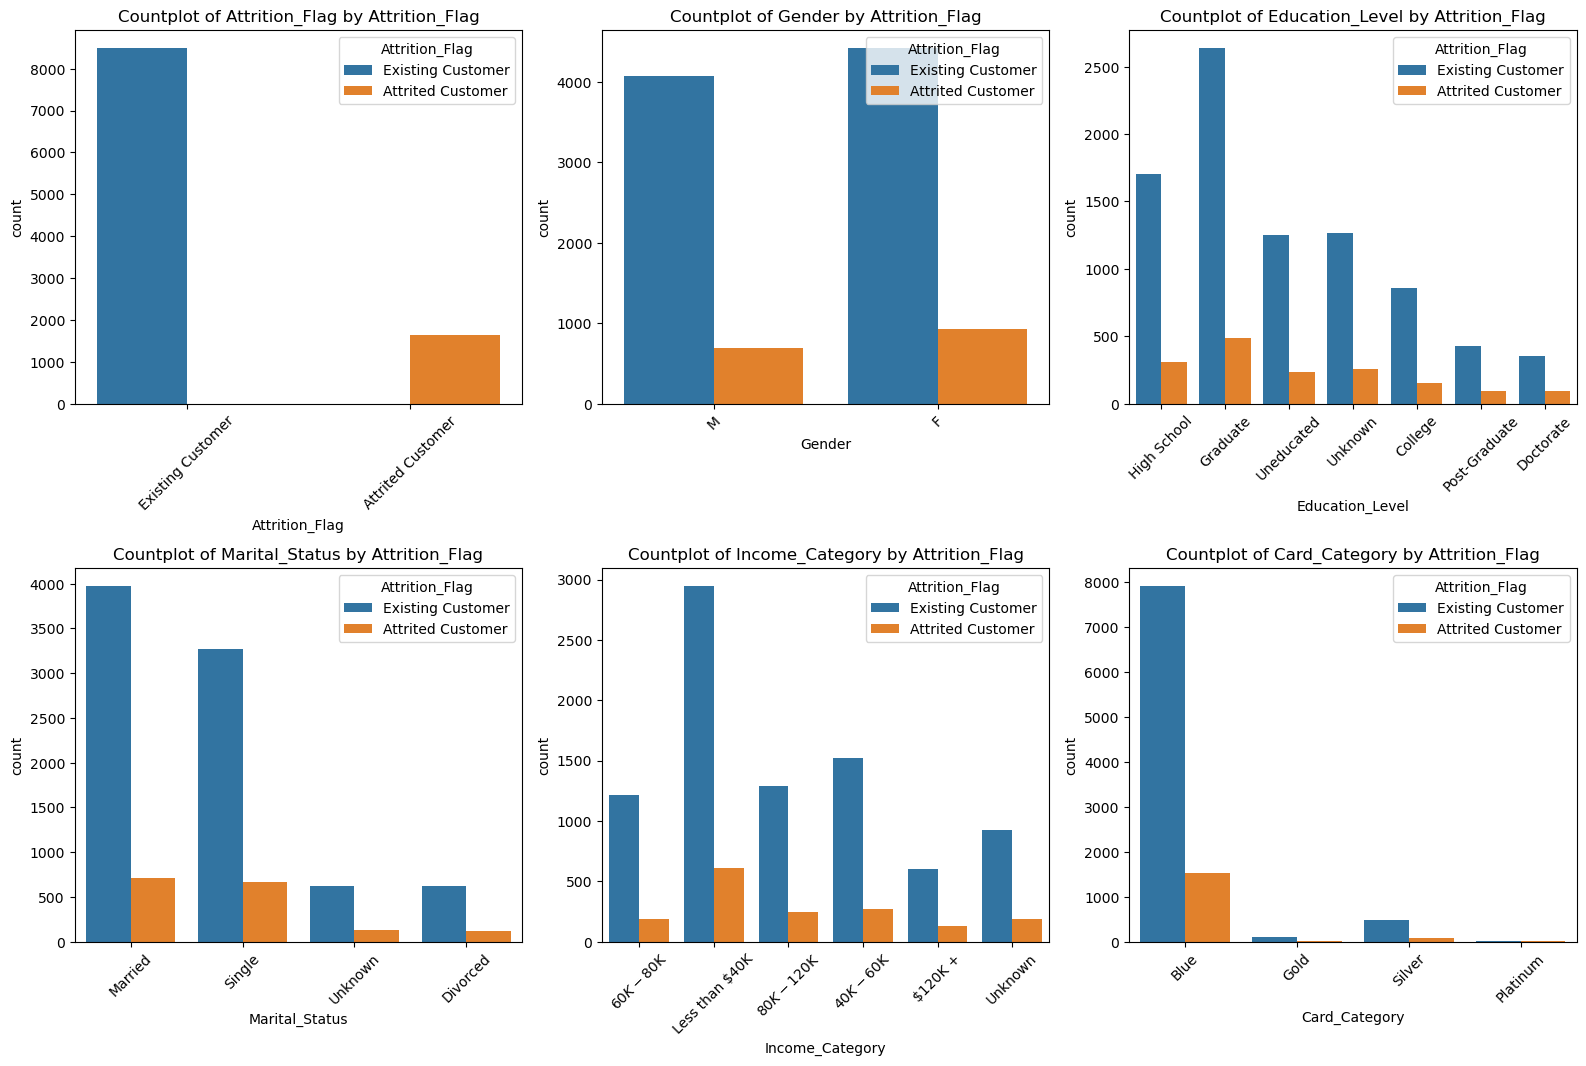

In [9]:
# Count plot for categorical features
categorical_columns = dfNew.select_dtypes(include='category').columns
plt.figure(figsize=(16, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='Attrition_Flag', data=df)
    plt.title(f'Countplot of {column} by Attrition_Flag')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

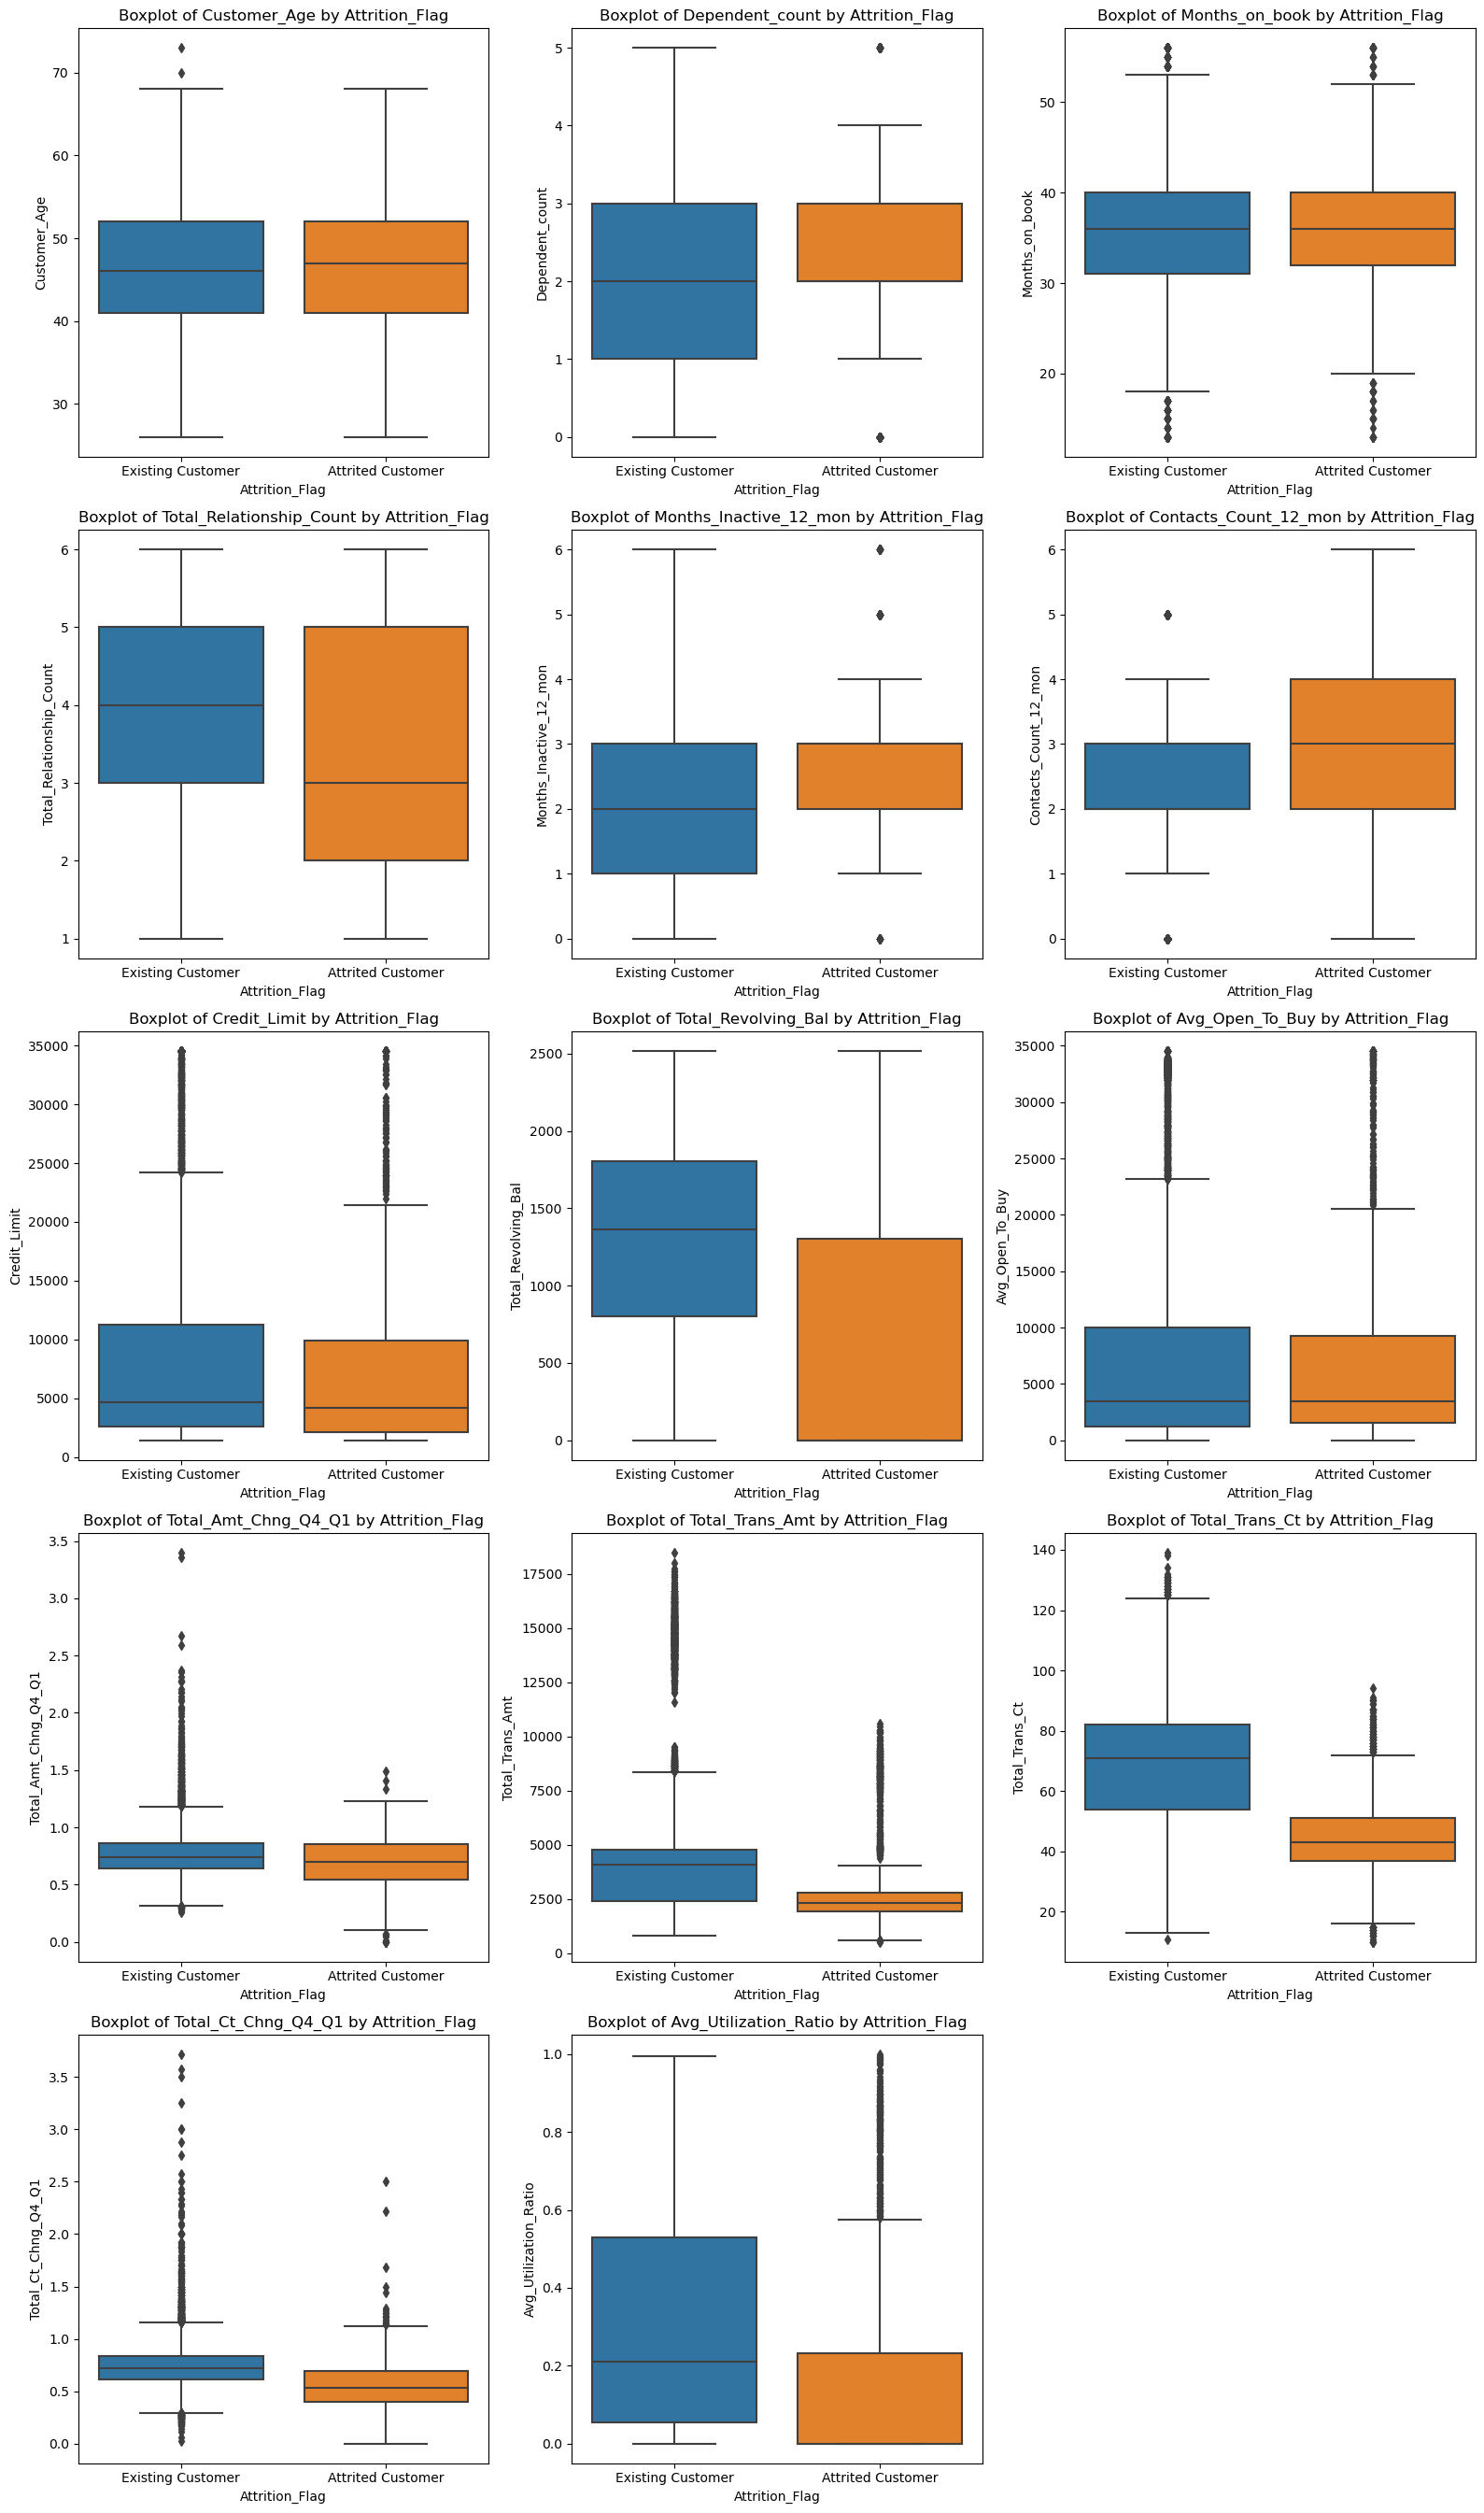

In [10]:
# Boxplot for understanding the distribution of numerical features by Attrition_Flag
df_numerical = dfNew.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(16, 27))
num_cols = len(df_numerical.columns)
rows = 5
cols = num_cols // rows + (num_cols % rows > 0)

for i, column in enumerate(df_numerical.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='Attrition_Flag', y=column, data=df)
    plt.title(f'Boxplot of {column} by Attrition_Flag')
plt.tight_layout()
plt.show()


In [11]:
#Encoding nominal categorical columns

#Dummy encoding Card_Category and Marital Status
dfNew = pd.get_dummies(dfNew, columns=['Card_Category'], prefix='Card_Category', drop_first=True)
dfNew = pd.get_dummies(dfNew, columns=['Marital_Status'], prefix='Marital_Status', drop_first=True)

#Display the modified DataFrame
dfNew.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Marital_Status_Married,Marital_Status_Single
0,0,45,0,3,2,3,39,5,1,3,...,1.335,1144,42,1.625,0.061,0,0,0,1,0
1,0,49,1,5,4,1,44,6,1,2,...,1.541,1291,33,3.714,0.105,0,0,0,0,1
2,0,51,0,3,4,4,36,4,1,0,...,2.594,1887,20,2.333,0.000,0,0,0,1,0
3,0,40,0,3,1,3,21,5,1,0,...,2.175,816,28,2.500,0.000,0,0,0,1,0
4,0,44,0,2,4,2,36,3,1,2,...,1.376,1088,24,0.846,0.311,0,0,0,1,0


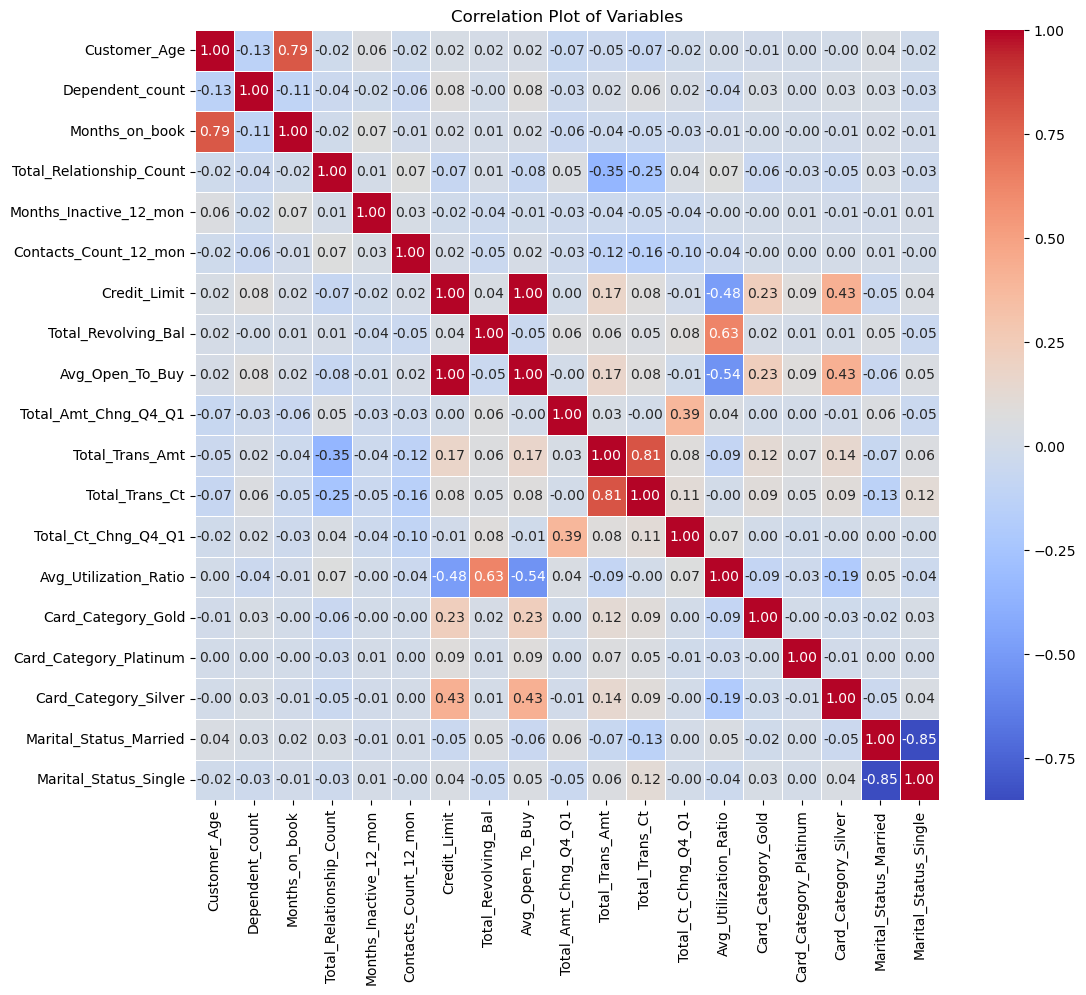

In [12]:
# Calculate the correlation matrix
correlation_matrix = dfNew.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot of Variables')
plt.show()

In [13]:
#Remove one of highly correlated variables to avoid multicollinearity
dfNew = dfNew.drop(['Months_on_book', 'Avg_Open_To_Buy', 'Marital_Status_Single', 'Total_Trans_Ct'], axis=1)
dfNew.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Marital_Status_Married
0,0,45,0,3,2,3,5,1,3,12691.0,777,1.335,1144,1.625,0.061,0,0,0,1
1,0,49,1,5,4,1,6,1,2,8256.0,864,1.541,1291,3.714,0.105,0,0,0,0
2,0,51,0,3,4,4,4,1,0,3418.0,0,2.594,1887,2.333,0.000,0,0,0,1
3,0,40,0,3,1,3,5,1,0,4716.0,0,2.175,816,2.500,0.000,0,0,0,1
4,0,44,0,2,4,2,3,1,2,4010.0,1247,1.376,1088,0.846,0.311,0,0,0,1


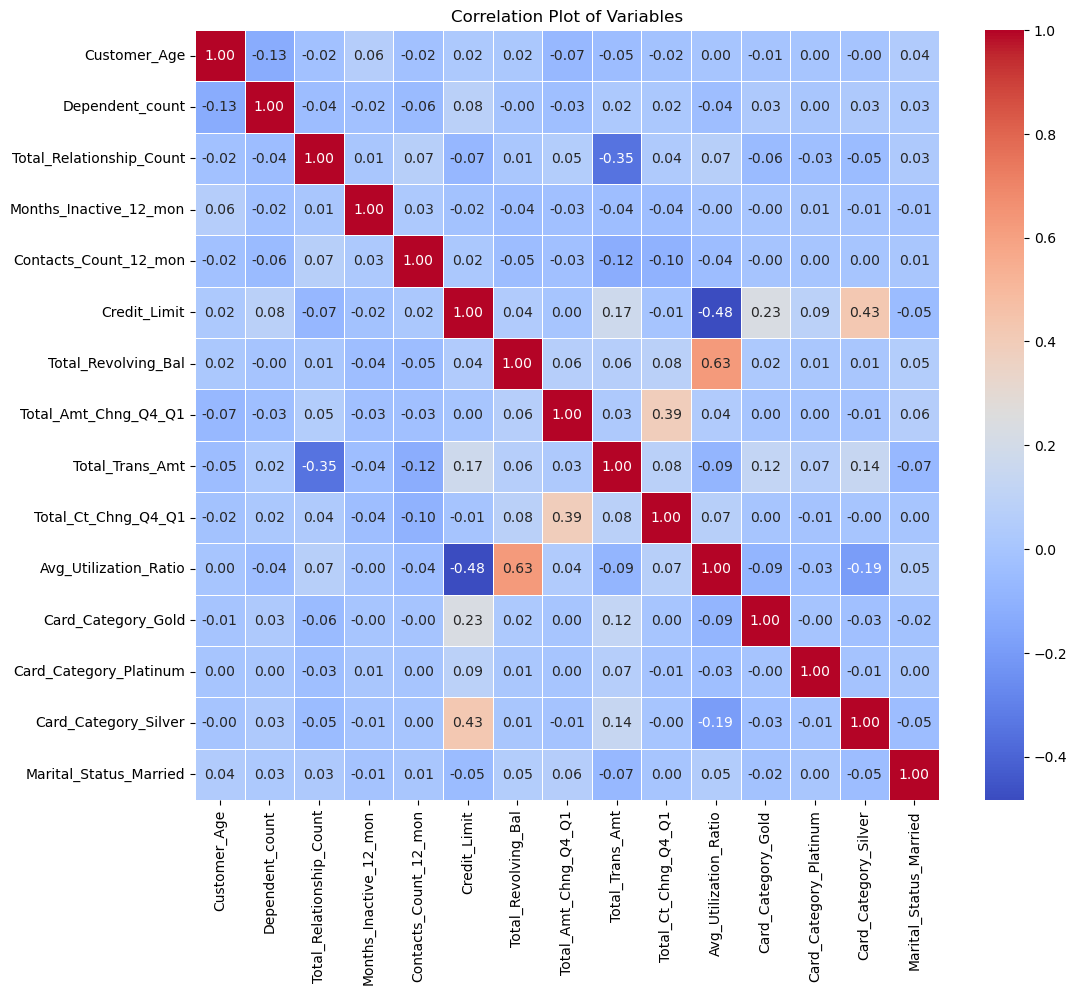

In [14]:
# Calculate the correlation matrix
correlation_matrix = dfNew.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot of Variables')
plt.show()

In [15]:
#Split dataset into Train andTest splits

X = dfNew.drop('Attrition_Flag', axis=1) 
y = dfNew['Attrition_Flag']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create dataframes of from splitted datasets
trainSet = pd.DataFrame(X_train).reset_index(drop=True)
trainSet['Attrition_Flag'] = y_train.reset_index(drop=True)

testSet = pd.DataFrame(X_test).reset_index(drop=True)
testSet['Attrition_Flag'] = y_test.reset_index(drop=True)

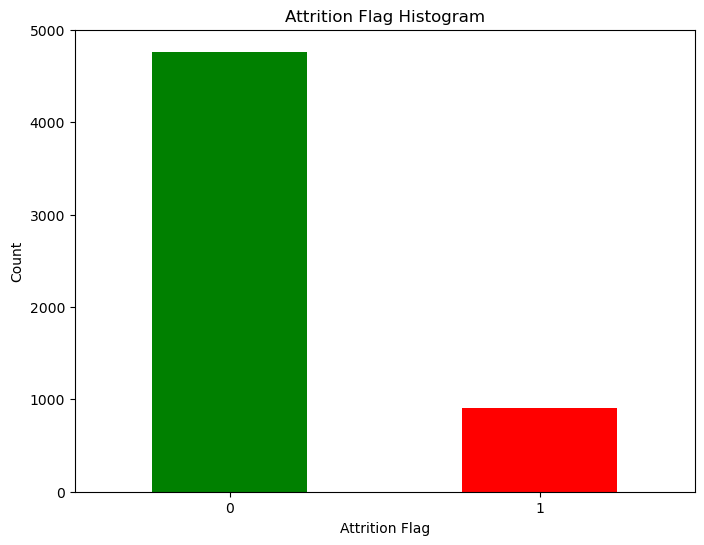

In [16]:
#Checking for class imbalance
attrition_flag_counts = trainSet['Attrition_Flag'].value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
attrition_flag_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Attrition Flag Histogram')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [17]:
#Random undersampling of the majority class
undersampler = RandomUnderSampler(sampling_strategy=0.3, random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

#SMOTE to oversample the minority class
cat_feats = [1, 3, 4]
smote = SMOTENC(sampling_strategy='minority', categorical_features=cat_feats, random_state=42)
X_train_final, y_train_final = smote.fit_resample(X_train_undersampled, y_train_undersampled)

y_train_final.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6006 entries, 0 to 6005
Series name: Attrition_Flag
Non-Null Count  Dtype   
--------------  -----   
6006 non-null   category
dtypes: category(1)
memory usage: 6.1 KB


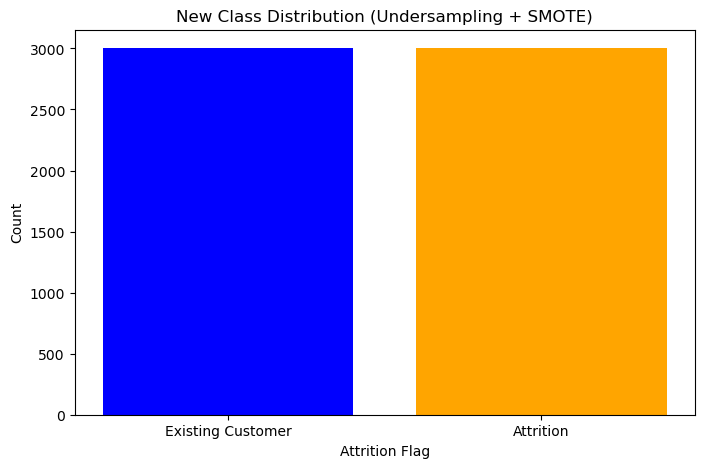

In [18]:
#Checking if class has been balanced

plt.figure(figsize=(8, 5))
plt.bar(Counter(y_train_final).keys(), Counter(y_train_final).values(), color=['blue', 'orange'])
plt.title('New Class Distribution (Undersampling + SMOTE)')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.xticks(list(Counter(y_train_final).keys()), ['Existing Customer', 'Attrition'])
plt.show()

In [19]:
#Feature Importance with Boruta

#Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators='auto', random_state=42)

#Initialize Boruta
boruta_selector = BorutaPy(rf_classifier, n_estimators='auto', random_state=42)

#Fit Boruta on the training data
boruta_selector.fit(X_train_final.values, y_train_final.values)

#Get selected features
selected_features = X.columns[boruta_selector.support_].tolist()

#Print selected features
print("Selected Features:", selected_features)

Selected Features: ['Customer_Age', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [20]:
#Train RandomForest Classifier
rf_classifier.fit(X_train_final, y_train_final)
y_pred = rf_classifier.predict(X_test)

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Classification Report (includes precision, recall, f1-score)
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1148   57]
 [  27  185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1205
           1       0.76      0.87      0.81       212

    accuracy                           0.94      1417
   macro avg       0.87      0.91      0.89      1417
weighted avg       0.95      0.94      0.94      1417



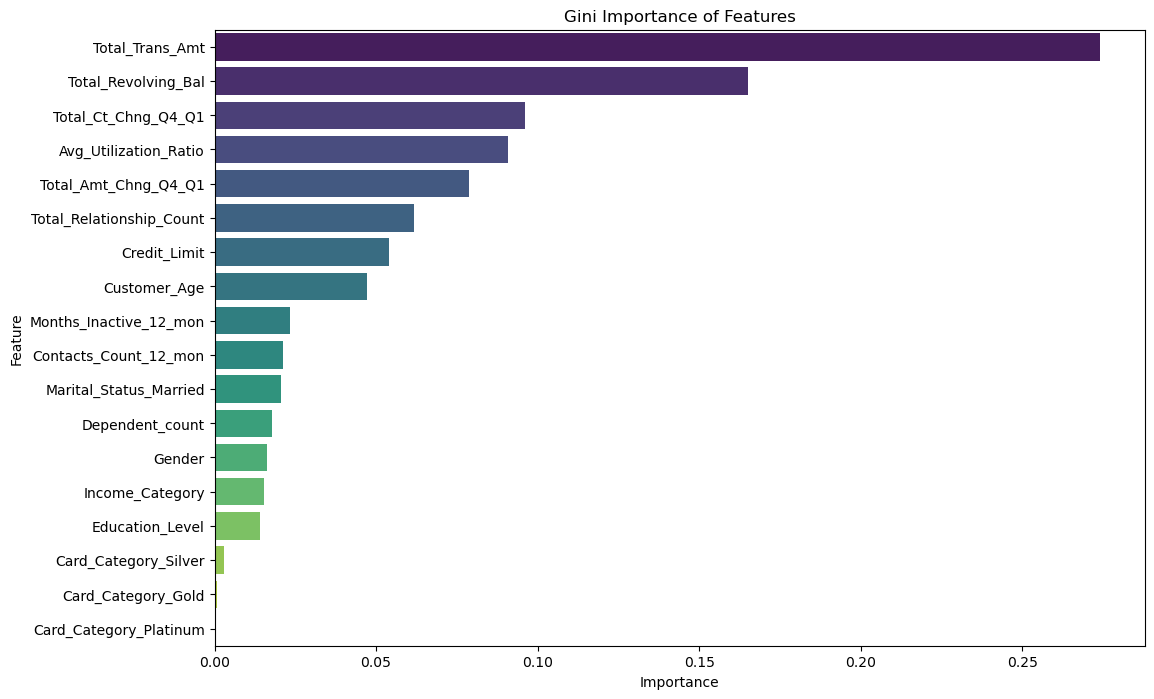

In [21]:
#Get feature importances
feature_importances = rf_classifier.feature_importances_

#Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

#Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Plot the importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Gini Importance of Features')
plt.show()

In [22]:
#Transform the training and testing data using Boruta selected featues
X_train_selected = boruta_selector.transform(X_train_final.values)
X_test_selected = boruta_selector.transform(X_test.values)

#Re-train RF Classifier
rf_classifier.fit(X_train_selected, y_train_final)
y_pred = rf_classifier.predict(X_test_selected)

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Classification Report (includes precision, recall, f1-score)
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1141   64]
 [  27  185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1205
           1       0.74      0.87      0.80       212

    accuracy                           0.94      1417
   macro avg       0.86      0.91      0.88      1417
weighted avg       0.94      0.94      0.94      1417



In [23]:
#Add a constant term to the features for the intercept
X_train_with_intercept = sm.add_constant(X_train)

#Create a logistic regression model using Statsmodels
logit_model = sm.GLM(y_train, X_train_with_intercept, family=sm.families.Binomial())

#Fit the model
result = logit_model.fit()

#Print the summary of the logistic regression
print(result.summary())

#Odds Ratio
odds_ratios = np.exp(result.params)
print("Odds Ratios:")
print(odds_ratios)

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Attrition_Flag   No. Observations:                 5664
Model:                            GLM   Df Residuals:                     5645
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1765.1
Date:                Sat, 09 Dec 2023   Deviance:                       3530.3
Time:                        17:20:45   Pearson chi2:                 8.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2235
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Assuming X_train_with_intercept and y_train are your data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation scores
cv_scores = []

for train_index, test_index in kf.split(X_train_with_intercept):
    X_train_cv, X_test_cv = X_train_with_intercept.iloc[train_index], X_train_with_intercept.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create and fit the logistic regression model
    logit_model_cv = sm.GLM(y_train_cv, X_train_cv, family=sm.families.Binomial())
    result_cv = logit_model_cv.fit()

    # Make predictions on the test set
    y_pred_cv = result_cv.predict(X_test_cv)
    y_pred_class_cv = (y_pred_cv > 0.5).astype(int)

    # Evaluate the model and store the accuracy
    accuracy_cv = accuracy_score(y_test_cv, y_pred_class_cv)
    cv_scores.append(accuracy_cv)

# Calculate and print the average cross-validation accuracy
average_cv_accuracy = sum(cv_scores) / len(cv_scores)
print("Average Cross-Validation Accuracy:", average_cv_accuracy)

Average Cross-Validation Accuracy: 0.8871807546804973


In [ ]:
#Insights: 
#Higher contact counts and longer inactive periods are connected to increased churn rates. Customers with higher income have a higher propensityto churn.

#Actions
#Develop plans to re-engage customers who have been inactive for long periods of time.
#Provide personalized services to high-net worth customers to improve their experience and strengthen loyalty.


#Insights:
#Variables like total transaction count, total relationship count, and credit limit play a crucial role in churn prediction.

#Actions
#Monitor these metrics closely in real time and proactively engage customers who show a decline in activity. 
#Offer personalized incentives or rewards to encourage increased engagement.


#Insights:
#Higher income categories are associated with a higher likelihood of churn.

#Actions:
#It might be beneficial to offer premium services or personalized support to high-income customers to enhance their experience and loyalty.